# Analysis of Prosper Loan data
## by Tobias Hagemann



## Table of Contents
- [Introduction](#intro)
- [Extract](#extract)
- [Preliminary Wrangling](#wrangling)
- [Univariate Exploration](#univariate)
- [Assess](#assess)
- [Clean](#clean)
- [Save & Store](#save)
- [Analyzing & Visualizing Data](#analyzing)




<a id='intro'></a>
## Introduction

The following data wrangling and visualization steps will be used to analyse the given prosper loan data and will allow to highlight relations for a bright variaty of different factors.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
(according to data set summary - https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True)

In order to generate the results the following steps will e performed:
1. Extract - Obtain the data from a spreadsheet, SQL, the web, etc.
2. Clean - Here we could use exploratory visuals.
3. Explore - Here we use exploratory visuals.
4. Analyze - Here we might use either exploratory or explanatory visuals.
5. Share - Here is where explanatory visuals live.

(According to Udacity defintion - https://classroom.udacity.com/nanodegrees/nd002-ent/parts/9c2eb5bf-2bda-4e0c-85bf-d997082a8571/modules/22d4ed2d-b711-4e1d-8fed-604f524f0595/lessons/420e3a94-23b1-48b2-bf3f-3bf12fcb0318/concepts/5abc9451-790f-43c9-9b78-4dbc32a53ba1)



As the table contains 81 different factors, there will be a focus limited to the most "interesting" factors based on the findings in the first analysis steps.

<a id='extract'></a>
## Extract

Before the main steps can be started, all necessary programs and the required data files are loaded.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

The data is provided via the following url and afterwords loaded as .csv file to start data wrangling.
Data Source: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv

In [2]:
df = pd.read_csv('prosperLoanData.csv')

<a id='wrangling'></a>
## Preliminary Wrangling

As there is a high amount of different columns, the following overview can be used to check on the different definitions and to get a quicker impression of what data is given: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [8]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [9]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
90102,542A3589380103986EDA203,899198,2013-09-12 15:17:55.373000000,NaN,60,Current,NaN,0.14760,0.1249,0.1149,...,-49.06,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
21774,AEB636028266516647CA4D0,1203405,2014-02-12 20:34:30.313000000,NaN,60,Current,NaN,0.16993,0.1465,0.1365,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
29617,346A3600329646124D3153B,1165371,2014-01-29 02:05:57.907000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-3.18,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
8782,AAE33578676550853AA3675,782591,2013-05-19 18:48:17.240000000,NaN,36,Current,NaN,0.09837,0.0849,0.0749,...,-64.35,0.0,0.00,0.00,0.0,1.0,0,0,0.0,181
31309,3A9F351561797921495C860,506633,2011-05-12 20:35:00.723000000,NaN,36,Current,NaN,0.32576,0.2899,0.2799,...,-96.55,0.0,0.00,0.00,0.0,1.0,3,0,0.0,18
26129,14443595771198762AC0EBD,1021043,2013-11-16 19:27:33.080000000,NaN,36,Current,NaN,0.33215,0.2925,0.2825,...,-9.80,0.0,0.00,0.00,0.0,1.0,0,0,0.0,37
11635,9F3F3598049868065A10243,1069928,2013-12-13 08:05:03.380000000,NaN,60,Current,NaN,0.15449,0.1314,0.1214,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
14568,19CE35183681063120ACDAB,512223,2011-06-19 19:15:14.147000000,NaN,60,Chargedoff,2014-01-05 00:00:00,0.20436,0.1899,0.1799,...,-234.55,0.0,9031.89,9031.89,0.0,1.0,0,0,0.0,200
59905,DBB633803559035226CB5A1,86399,2007-01-18 15:57:44.143000000,E,36,Completed,2010-01-23 00:00:00,0.25896,0.2500,0.2450,...,-18.59,0.0,0.00,0.00,0.0,1.0,0,0,0.0,31
67783,329F35525369793094176D8,610166,2012-07-10 17:52:03.957000000,NaN,36,Current,NaN,0.08829,0.0749,0.0649,...,-143.80,0.0,0.00,0.00,0.0,1.0,0,0,0.0,152


In [10]:
df.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [12]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [13]:
sum(df.duplicated())

0

### What is the structure of your dataset?

> The data set contains 113,937 entries with 81 different attributes related to loans and personal, financial backround such as fiscal rating or income.
Really obvious is the high ratio of quantitative data. 61 columns out of 81 are belonging to this group. Nevertheless, still a quarter of all data has to be considered for qualitative data analysis. 
Even though there is a huge amount of columns it is already becoming obvious that several factors are only filled for a limited number of cases.
Furthermore the quantitative data are already showing in the first highlevel view several outliers which have to be minitored carefully.


### What is/are the main feature(s) of interest in your dataset?

> Interesting are the relations between different personal data such as Income and Public Records etc. to see how loan ratings & availability are reffering to the personal backround of an individual borrower.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The high ratio of quantitive data might be supportive as the assumption is: Fair and proper loans are given based on hard facts and key figueres rather than qualitative.

<a id='univariate'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

As occupation is more or less linked to income and fiscal security, this should be the focus for the first visual exploration. Therefore, the TOP 15 occupation should be made visible.

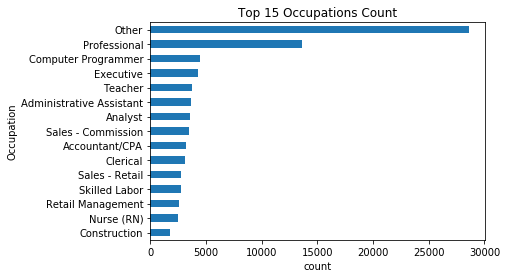

In [14]:
df['Occupation'].value_counts()[14::-1].plot(kind='barh')
plt.title('Top 15 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12
plt.figsize=(12,12)

Obviously, the borrowers are categorizing themselfs as "Other" or "Professional". It is not visible with this data set, if people want to hide their correct professions or any other reason is causing this results.

As this is not really supportive to get an impression of the fiscal background of borrowers, the income & employment status will be considered as well.

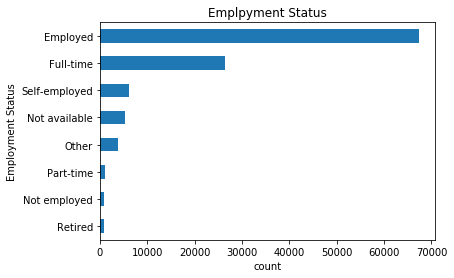

In [15]:
df['EmploymentStatus'].value_counts()[14::-1].plot(kind='barh')
plt.title('Emplpyment Status')
plt.xlabel('count')
plt.ylabel('Employment Status')
plt.fontsize = 12
plt.figsize=(12,12)

Like expected for typical borrowers, nearly everbody is somehow employed. Eventhough for statistical purpusos it would have been better if everbody marked as employed would have to explain if full or part time.

As mainly all are emmployed, the income should be considered now in addition.

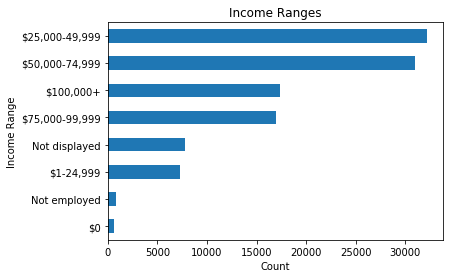

In [16]:
df['IncomeRange'].value_counts()[14::-1].plot(kind='barh')
plt.title('Income Ranges')
plt.xlabel('Count')
plt.ylabel('Income Range')
plt.fontsize = 12
plt.figsize=(12,12)

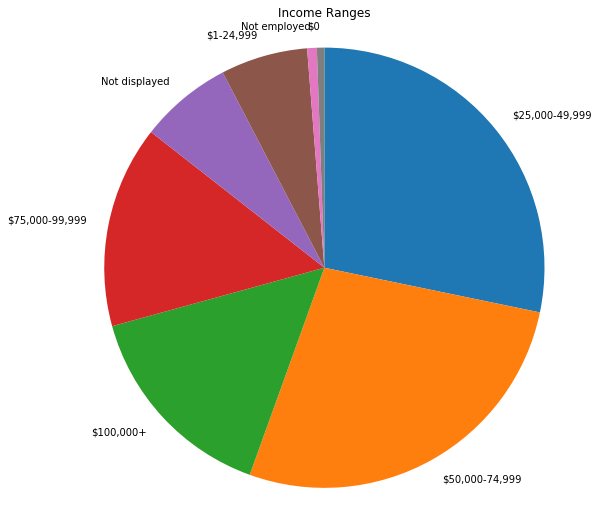

In [17]:
# Pie chart should make it a little bit easier to read out the income class.
plt.figure(figsize = [16, 9])

sorted_counts = df['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')
plt.title('Income Ranges');

Borrowers are mainly part of the mid size income classes. more than 50% have an income $25,000 - 74,999.
A deeper dive into concrete monthly salleries shall be done. Interesting are here more the most common incomes.

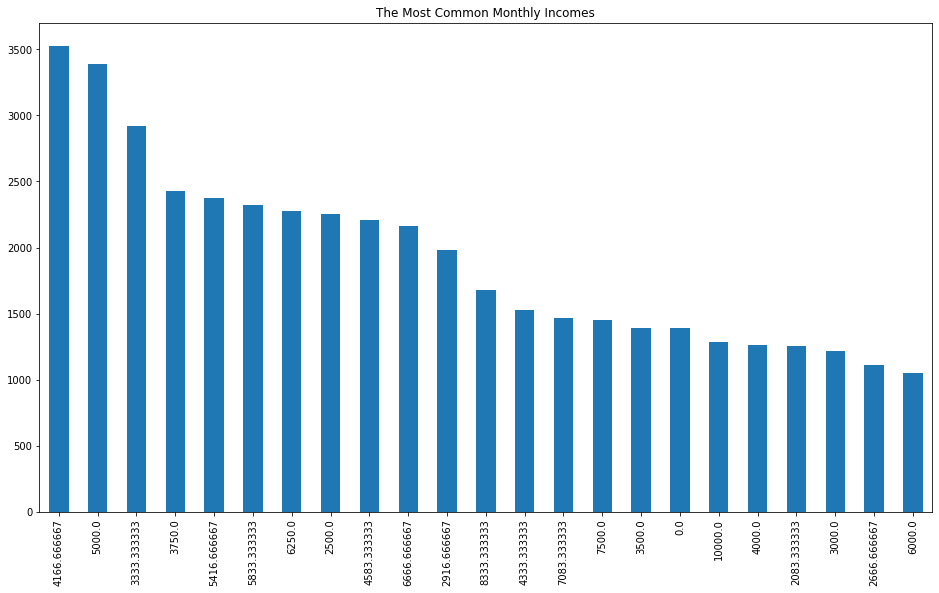

In [18]:
plt.figure(figsize = [16, 9])

top=df.groupby('StatedMonthlyIncome').filter(lambda x: len(x) >= 1000)
top['StatedMonthlyIncome'].value_counts().plot(kind = 'bar')
plt.title('The Most Common Monthly Incomes');

Interesting is, that nearly all incomes are above 2.500 USD or even more common above 3,333 USD  but the number of people with 0 income is still comparable high and under TOP10 in this view.

Another fiscal motivated criteria is the available credit in the moment of loan approval. At least this is one of the points checked by banks before setting the interests and deciding for loan approval.

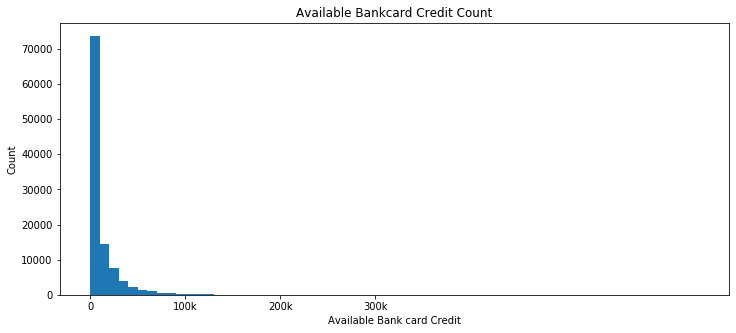

In [19]:
plt.figure(figsize = [12, 5])

bins = np.arange(0, df['AvailableBankcardCredit'].max(), 10000)
plt.hist(data = df, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 1e5, 2e5, 3e5], [0, '100k', '200k', '300k'])
plt.title('Available Bankcard Credit Count')
plt.xlabel('Available Bank card Credit')
plt.ylabel('Count');

Describe function is computed in addition to find the outliers easier.

In [20]:
df.AvailableBankcardCredit.describe()

count    106393.000000
mean      11210.225447
std       19818.361309
min           0.000000
25%         880.000000
50%        4100.000000
75%       13180.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

Most borrowers have just minimal credits available per bank card, which means that the ration of borrowed will be high for many of them. 
There are some outliers for people with high credit availabilities. It is obvious, that they ratings, interets etc will be in good shapes. So, they will be ignored for furtehr investgations and a limit of 120,000 set. The value is -based on the current exchange rate- a base price for a Porsche 911 Carrera (www.porsche.com), which is my personal definition of rich enough to get a good loan rating and low interests etc.. Furthermore this value is inline with the most common monthly incomes.

In [21]:
df_highlimit = df[df['AvailableBankcardCredit'] > 120000]
df_limit = df.drop(df_highlimit.index)

df_limit.AvailableBankcardCredit.describe()

count    105967.000000
mean      10545.357423
std       16096.992564
min           0.000000
25%         873.000000
50%        4065.000000
75%       12980.000000
max      119920.000000
Name: AvailableBankcardCredit, dtype: float64

"df_limit" will be used for further investigations of the Bank Card Credit.

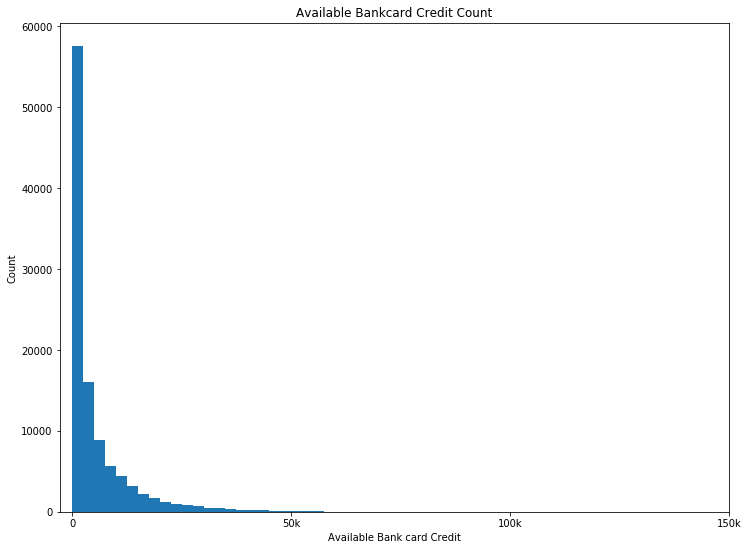

In [22]:
plt.figure(figsize = [12, 9])

bins = np.arange(0, df_limit['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = df, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 1e5, 2e5, 3e5], [0, '50k','100k', '150k'])
plt.title('Available Bankcard Credit Count')
plt.xlabel('Available Bank card Credit')
plt.ylabel('Count');

Interesting to know would be, how the borrowers are rated. Later on, it has to be analyzed, if there is a strong relation between income, Bank Card Credit and rating.

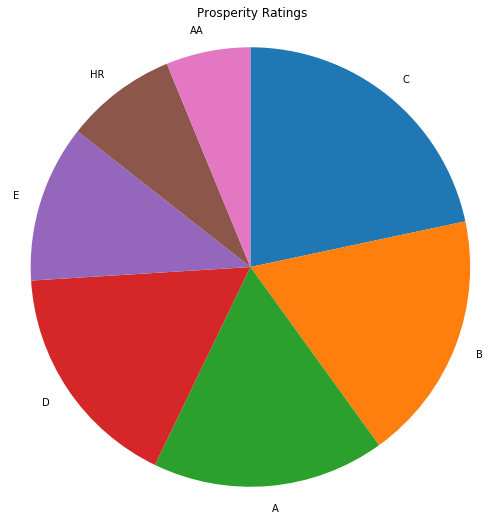

In [23]:
plt.figure(figsize = [16, 9])

sorted_counts = df_limit['ProsperRating (Alpha)'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')
plt.title('Prosperity Ratings');

Allthough that nearly a quarter of all borrowers is rated really high (AA & A) but most only medium ratings.

Furthermore, it would be intersting to see, which value the loans had, when been given to the borrowers.

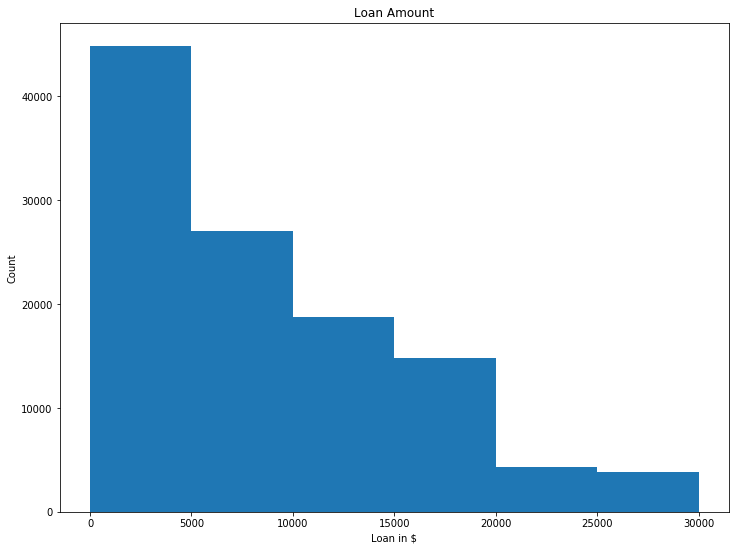

In [24]:
plt.figure(figsize = [12, 9])

bins = np.arange(0, df_limit['LoanOriginalAmount'].max(), 5000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Amount')
plt.xlabel('Loan in $')
plt.ylabel('Count');

Most loans are of a low value. For the further analysis it should be considered if this is somehow linked to income or employement status.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The "AvailableBankcardCredit" has been limited to 120,000k to delete the outliers.
There are several findings, e.g. that is possible to hide the occupation or that you can answer the employement status by "employed" instead of clearly "full.time" or "partly". This cannot be corrected within this analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> E.g. the date columns should be set to dates rather than objects. But as they are not focus of this investigation, they will be kept. ==> Lieber ein paar löschen

## Bivariate Exploration

> Value selection:
All values from above, but to indicate the financial rating is replaced by ProsperScore which is showing the rating in an quantitative way.

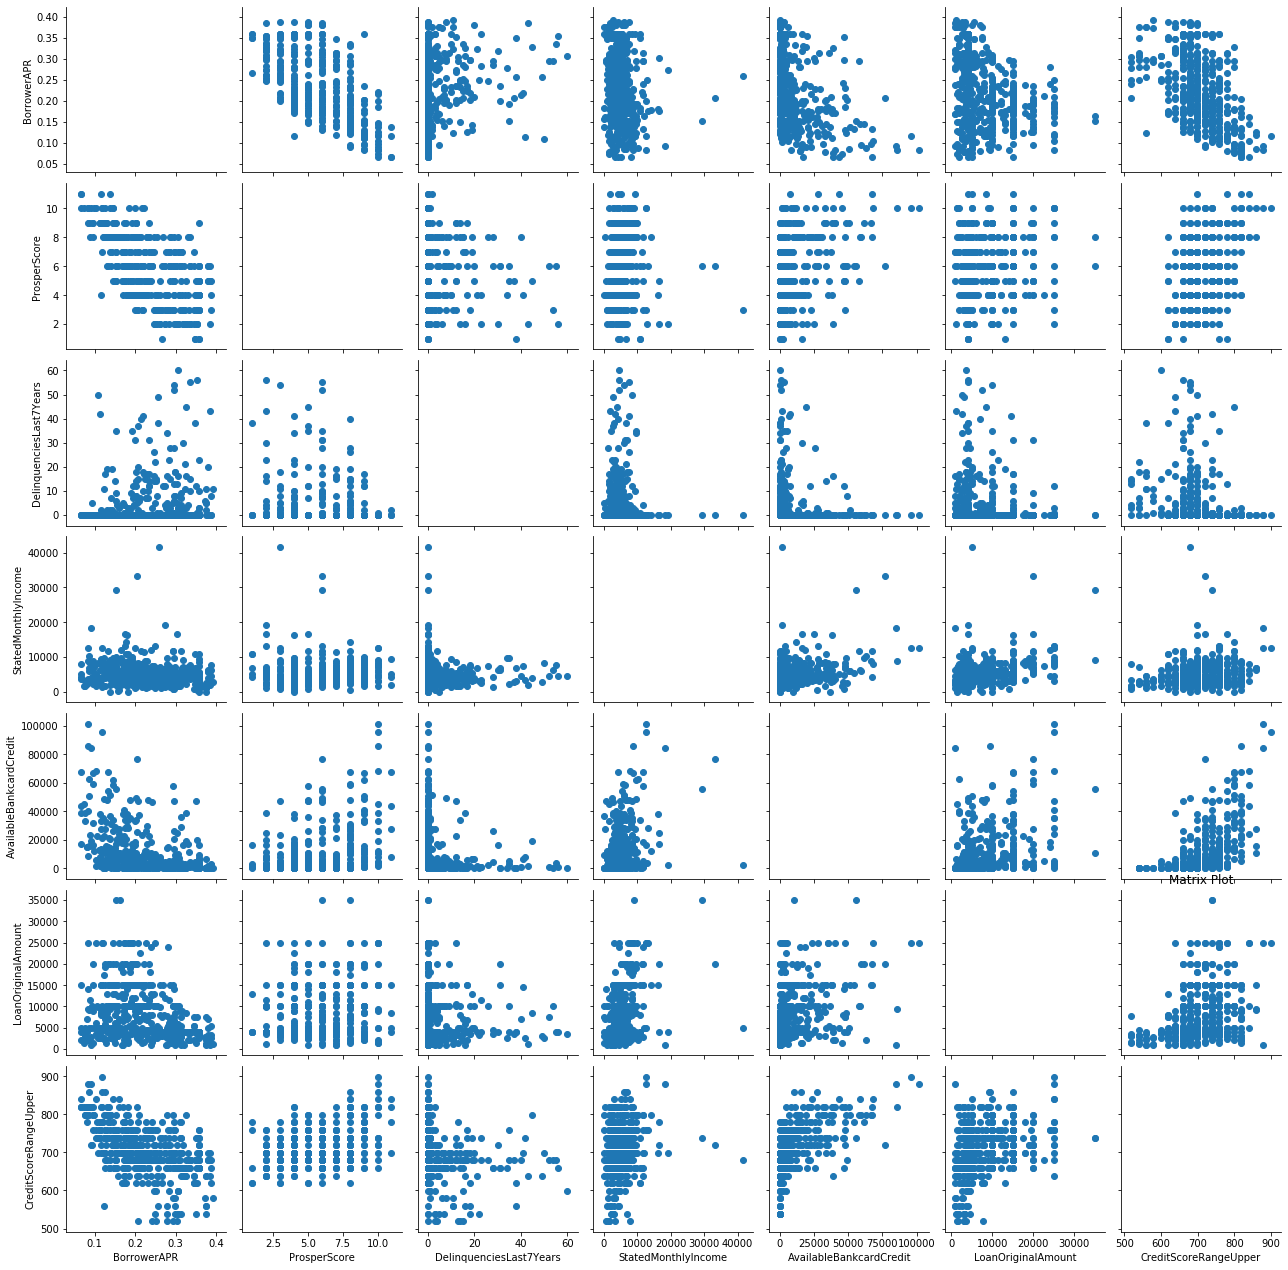

In [3]:
num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'LoanOriginalAmount','CreditScoreRangeUpper']

samples = np.random.choice(df.shape[0], 500, replace = False)
loan_samp = df.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = num_vars)
g.map_offdiag(plt.scatter)
plt.title('Matrix Plot');

As the scatter is not showing a clear picture, which values should be investigated deeper, a correlation plot shall show it more obviously.

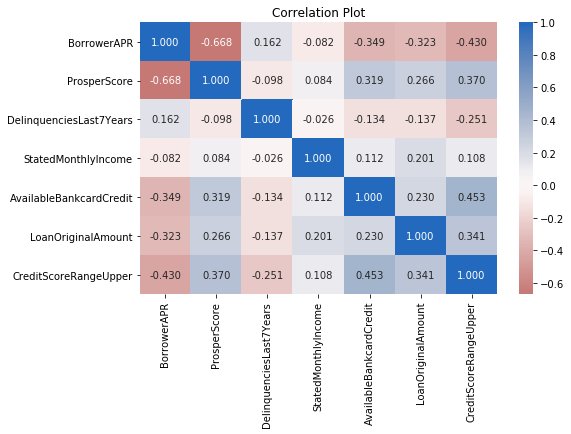

In [21]:
num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'LoanOriginalAmount','CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

As the borrowers APR has some several higher values, this should be analysed in detail, if there might be combinations of different values leading in sum to a higher impact on the APR.

In [58]:

# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
samples = np.random.choice(df.shape[0], 150, replace = False)
samp = df_limit.loc[samples,:]

plt.figure(figsize = [8, 5]);
plt.scatter(data = samp, x = 'AvailableBankcardCredit', y = 'BorrowerAPR', alpha = 1/10);
#plt.xlim([0, 3.5])
plt.xlabel('Available Bank Card Credit');
plt.yscale('log');
plt.yticks([0.1, 0.2, 0.5, 1.0, 1.5], [0.5, 1.0, 1.5]);
plt.ylabel('Duration (min)');
plt.title('Impact of Available Bank Card Credit') 

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

It is bekomming obvious that the avalable bank card credit is impacting the APR directly. At the same time it is becoming visible that most borrowers do not have a bigger available bank account. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Indeed there seem to be some interesting relations which should be analysed like:
    - BorrowerAPR vs. CreditScoreRangeUpper ==> If the credit score is in a better shape, the APR can be reflecting this  
      result.
    - BorrowerAPR vs. ProsperScore ==> People with higher rating seem to be more reliable and therefore banks are giving lower       BorrowerAPR.
    - AvailableBankCardCredit vs. CreditScoreRangeUppern ==> If people are able to pay other loans or invest directly without  
      loans for other things, they are liquid and therefore the risk is rather low for the new loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In general many of this comparisons are not showing high correlation indications.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [52]:
# Support function for Heatmaps "hist2grid":
# https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist2d.html
# https://code.i-harness.com/de/docs/matplotlib~3.0/_as_gen/matplotlib.pyplot.hist2d   (German) 
    
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color');
    plt.title('Prosperity Rating'); 
    plt.hist2d(x, y, bins = [10, 10], cmap = palette, cmin = 0.5);

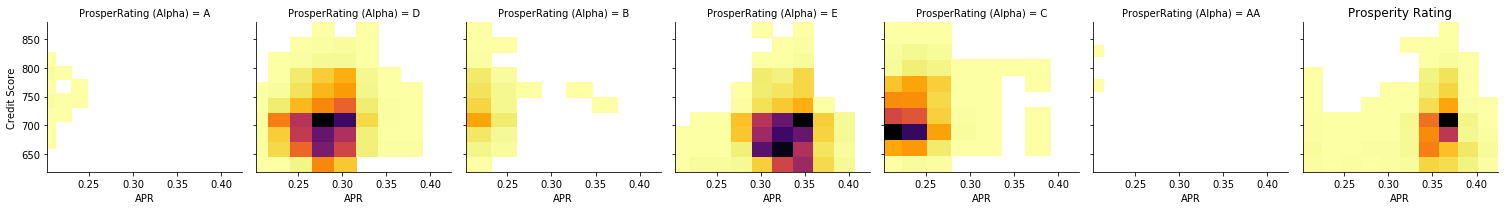

In [53]:
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', height = 3);
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeUpper', color = 'inferno_r');
g.set_xlabels('APR');
g.set_ylabels('Credit Score');
plt.title('Prosperity Rating'); 

The results are not surprising. Borrowers with better financial background (indicated by the rating) will get better conditions and easier a loan as they can be more trusted as financial robust.

In [ ]:
# Violinplot - duration (min) per user type and gender

graph = sb.catplot(data=df_limit, x='AvailableBankcardCredit', y="BorrowerAPR", hue="ProsperRating (Alpha)", kind="violin", height=9, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Even though the number of different values are really high, many attributes do not correlate much or not at all. But there are some but obvious factors like the Borrowerer Prosperity ranking which is a complete game changer with each high impact.

### Were there any interesting or surprising interactions between features?

> The absolute monthly income was surprisingly not that important. In the real world it would be intersting to use the monthly income & the prosperity rating to go into details and check e.g. if people with high income have additional loans for further investment objects or have also higher fix costs as they have better insurances etc.. 